 # Tienda Online Ice


La siguiente tienda quiere saber los proyectos de juegos del siguiente año para la campaña publicitaria, vamos analizar las cinco plataformas principales, describiendo las variaciones en sus cuotas de mercado de una región a otra, los cinco géneros principales y explica la diferencia, por ultimo ver si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Tambien vamos a poner en prueba las siguientes hipotesis:
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.


## Descripción de datos
* `Name` (Nombre)
* `Platform` (Plataforma)
* `Year_of_Release` (Año de lanzamiento)
* `Genre` (Género)
* `NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses)
* `EU_sales` (ventas en Europa en millones de dólares estadounidenses)
* `JP_sales` (ventas en Japón en millones de dólares estadounidenses)
* `Other_sales` (ventas en otros países en millones de dólares estadounidenses)
* `Critic_Score` (máximo de 100)
* `User_Score` (máximo de 10)
* `Clasificación` (ESRB)

## Iniciación

Carga de las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import levene

Carga de los datos

In [2]:
df = pd.read_csv('/datasets/games.csv')

## Exploración de los datos

Veamos los datos del DataFrame y sus datos

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Vamos a corroborar que esten todos los type de los datos correctos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se observan valores ausentes, veamos cuantos son por columna

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

##  Prepara los datos

Vamos a corregir los tipos de datos mal cargados de las columnas `year_of_release` y de `user_score`, los nombres de las columnas y analizar los NaN

In [6]:
# Cambiamos los nombres de las columnas
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating' ]

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Los valores en la columna `year_of_release` deberían ser numeros enteros, para tratar los NaN  en lugar de float

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_of_release'].dtype

Int64Dtype()

Veamos los valores que toma la columna `user_score`

In [9]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Vemos que hay valores que salen como `tbd`, los vamos a tratar mas adelante

### Valores Ausentes

Veamos la descripción de los valores de cada columna para saber a que nos enfretamos

In [10]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### `name` y `genre`

Los NaN de las columnas `name` y `genre`son solo 2 asi que vamos a eliminarlos no van a influir en los datos finales 

In [11]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### `year_of_releace`

In [12]:
nan_year = df['year_of_release'].isna().sum() / len(df['year_of_release']) * 100
print(nan_year)

1.6095255190570215


Los valores NaN de `year_of_release` son el 1,6 de los datos y no puedo rellenarlos con valores como la media o la mediana, porque estaria introduciendo un error con juegos de 1980 como del 2006 o del 2016 como del 2006, por lo que creo que lo mas razonable seria eliminarlos

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### `user_score` y `critic_score`

Los valores que se observan de la puntuacion de los usuarios como `tbd` deberia corresponder al `rating` propocionado por Entertainment Software Rating Board (ESRB). Voy a reemplazar las columnas de `rating`que se encuentren con valores NaN por las mismas que sean `tbd`en `user_score`, creo que fue por un error de tipeo y luego a las columnas que posean `tbd` seran llenadas con NaN.

In [14]:
# filtrar los valores que son 'tbd'
tbd_count = df.loc[df['user_score'] == 'tbd', 'user_score'].count()
# mostrar los resultados
print("El valor 'tbd' aparece", tbd_count, "veces en la columna 'user_score'.")

El valor 'tbd' aparece 2376 veces en la columna 'user_score'.


In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Veo que los valores ausentes de `user_score` son similares a los de `rating` por lo que me da a pensar que se corresponden

In [16]:
# Reemplazar los valores NaN de 'rating' cuando 'user_score' es 'tbd'
mask = df['user_score'] == 'tbd'
df.loc[mask, 'rating'] = df.loc[mask, 'rating'].fillna('tbd')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6626
dtype: int64

No hay valores que correspondan a `tbd` de la columna `user_score` con valores `NaN` de la columna `rating`, asi que voy a convertir los valores `tbd` a `NaN`.

In [17]:
# Reemplazamos 'tbd' por NaN en la columna 'user_score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [18]:
# Convertimos la columna 'user_score' a tipo de datos 'float'
df['user_score'] = df['user_score'].astype('float')
df['user_score'].dtype

dtype('float64')

Ahora si los dtype estan correctos

Los valores NaN de `user_score` y `critic_score` son demasiados para eliminarlos voy a dejarlos por el momento capaz que mas adelante pueda ver una relación entre ellos. Se corrigio los valores atipicos que salian como `tbd`

#### `rating`

En `rating` tenemos que ver el genero primero para que se corresponda con el sistema de clasificación (ESRB) 

In [19]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [20]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'tbd' 'EC' 'RP']


Los valores que se observan son:
* E = Everyone (Todos)
* M = Mature (Maduro )
* T = Teen (Adolescentes)
* E10+ = Everyone 10+ (Todos mayores de 10 años)
* K-A = Kid to Adult (De chicos a Adultos)
* AO = Adult Only (Adultos Solamente)
* tbd = to be determined" (a determinar)
* EC = Early Childhood (Niñez Temprana)
* RP = Rating Pending (Aun Sin Clasificar)

Creo una función que me rellene los valores NaN, dependiendo del genero del juego 

In [21]:
def fill_missing_ratings(df):
    rating_dict = {
        'Everyone': 'E',
        'Mature': 'M',
        'Teen': 'T',
        'Everyone_10+': 'E10+',
        'Kid_to_Adult': 'K-A',
        'Adult_Only': 'AO',
        'Early_Childhood': 'EC',
        'Rating_Pending': 'RP'
    }
    for index, row in df.iterrows():
        if pd.isna(row['rating']):
            genre = row['genre']
            if genre in ['Sports', 'Racing']:
                df.at[index, 'rating'] = rating_dict['Everyone']
            elif genre in ['Action', 'Simulation']:
                df.at[index, 'rating'] = rating_dict['Mature']
            elif genre in ['Shooter']:
                df.at[index, 'rating'] = rating_dict['Teen']
            elif genre in ['Platform', 'Adventure','Role-Playing']:
                df.at[index, 'rating'] = rating_dict['Everyone_10+']
            elif genre in ['Puzzle', 'Strategy']:
                df.at[index, 'rating'] = rating_dict['Early_Childhood']
            else:
                df.at[index, 'rating'] = rating_dict['Rating_Pending']
        elif row['rating'] == 'tbd':
            df.at[index, 'rating'] = rating_dict['Rating_Pending']
    return df

Compruebo si funciono el llenado de los valores NaN

In [22]:
df = fill_missing_ratings(df)
df['rating'].isna().sum()

0

No se ven ningun valor NaN, funciono correctamente

### Calcula de las ventas totales

Vamos a ver las ventas totales de cada region para cada juego

In [23]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)
df.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E10+,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E10+,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,EC,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,T,28.31


### Conclusion Parcial

Habian mas de 1 dato ausente en algunas filas, sobretodo en `critic_score`, `user_score` y `rating`  esto se debe a que recien se implemento la clasificación ESRB en el año 1994, es por ello que los juegos de los años anteriores a esa fecha carecian de estos datos y la industria de los videosjuegos no estaba tan desarrollada como para calificar los juegos dependiendo de la experiencia de los expertos y los usuarios.

Se dejaron los NaN de las columnas `critic_score` y `user_score`, para ver si habia alguna relación entre ellos y la encontramos, todos estos valores corresponden a juegos de la compañia Nintendo, por alguna razón a la compañia no le interesa que sus juegos sea valorados por los criticos y los usuarios.

El resto de los datos ausentes solo fueron errores humanos.

## Analisis de datos

### Juegos

Veamos cuantos juegos fueron lanzados por año

In [24]:
df['year_of_release'].value_counts(sort=True, ascending=True)

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: Int64

Grafiquemos esta tabla para verla mejor

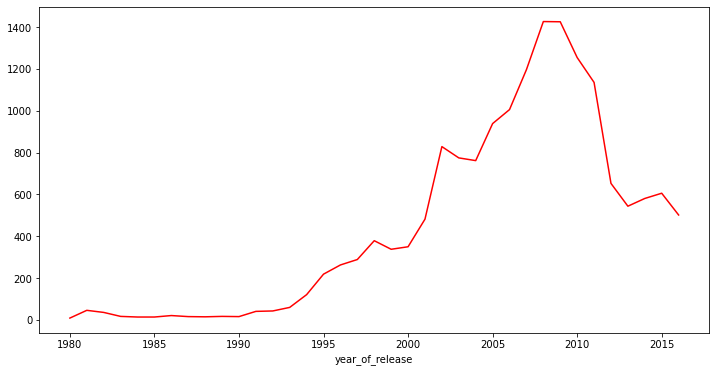

In [25]:
df.groupby('year_of_release')['total_sales'].count().plot(color='r')
fig=plt.gcf()
fig.set_size_inches(12,6)

La cantidad de juegos lanzados fue aumentando con los años, hasta llegar al maximo que fue en los años 2008-2009 y a partir del 2010 ya fueron decayendo

### Plataformas

Veamos cuantos juegos se vendieron cada año por plataforma, esto nos va a dar una idea de cada cuentos años surge una nueva plataforma.

In [26]:
# Agrupamos las plataformas por los años de lanzamientos con las ventas totales de juegos
grouped = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


Creo una función que me muestre solo los años maximos y minimos de cada plataforma junto con las ventas totales de los mismos años, para tener una idea de cada cuantos años sale una nueva consola de videojuegos

In [27]:
def get_sales_by_platform_and_year(df):
    # Agrupar el dataframe por plataforma y año de lanzamiento y sumar las ventas totales de juegos
    grouped = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

    # Crear un nuevo dataframe para almacenar los años máximos y mínimos de cada plataforma junto con las ventas totales de los mismos años
    result = pd.DataFrame(columns=['platform', 'min_year', 'min_sales', 'max_year', 'max_sales'])

    # Iterar por cada plataforma en el dataframe agrupado
    for platform in grouped['platform'].unique():
        # Filtrar el dataframe agrupado para obtener solo las filas correspondientes a la plataforma actual
        platform_sales = grouped[grouped['platform'] == platform]

        # Obtener el año mínimo y las ventas totales correspondientes
        min_year = platform_sales.loc[platform_sales['total_sales'].idxmax(), 'year_of_release']
        min_sales = platform_sales.loc[platform_sales['total_sales'].idxmax(), 'total_sales']

        # Obtener el año máximo y las ventas totales correspondientes
        max_year = platform_sales.loc[platform_sales['total_sales'].idxmin(), 'year_of_release']
        max_sales = platform_sales.loc[platform_sales['total_sales'].idxmin(), 'total_sales']

        # Añadir una nueva fila al dataframe de resultados con los años máximos y mínimos y las ventas totales correspondientes
        result = result.append({'platform': platform, 'min_year': min_year, 'max_year': max_year, 'min_sales': min_sales,  'max_sales': max_sales}, ignore_index=True)

    return result

In [28]:
result = get_sales_by_platform_and_year(df)
result

,platform,min_year,min_sales,max_year,max_sales
0,2600,1981,35.68,1984,0.27
1,3DO,1995,0.08,1994,0.02
2,3DS,2011,63.20,2016,15.14
3,DC,2000,5.99,2007,0.02
4,DS,2007,146.94,1985,0.02
5,GB,1989,64.97,1988,1.43
6,GBA,2004,77.91,2000,0.07
7,GC,2002,51.81,2007,0.27
8,GEN,1992,12.64,1993,0.65
9,GG,1992,0.04,1992,0.04


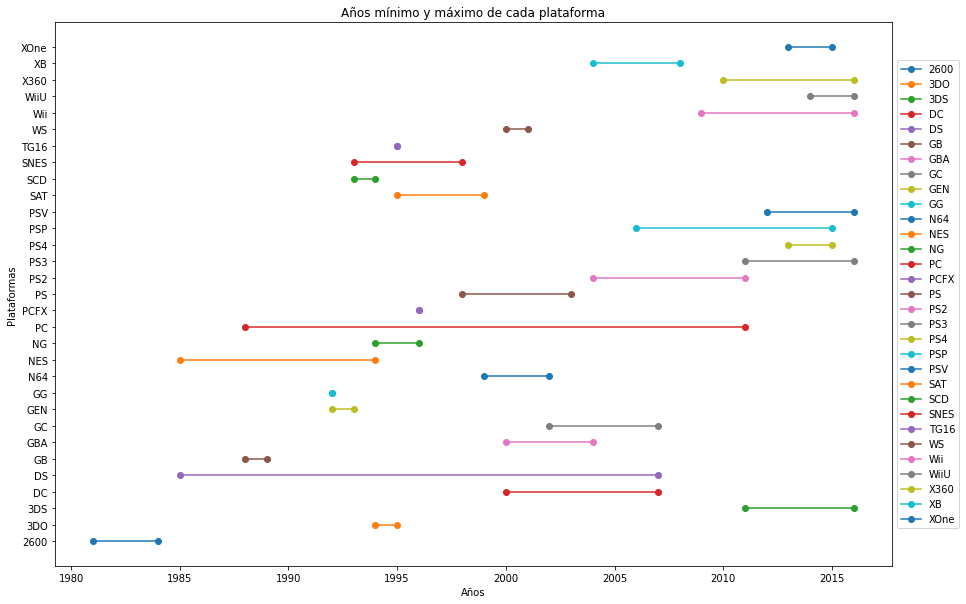

In [29]:
# Crear una figura
fig, ax = plt.subplots(figsize=(15, 10))

# Iterar a través de cada plataforma y añadir una línea para cada una
for i, row in result.iterrows():
    # Obtener los datos de años mínimo y máximo para la plataforma actual
    min_year = row['min_year']
    max_year = row['max_year']
    
    # Añadir una línea al gráfico para la plataforma actual
    ax.plot([min_year, max_year], [i, i], '-o', label=row['platform'])

# Configurar el gráfico
ax.set_xlabel('Años')
ax.set_ylabel('Plataformas')
ax.set_title('Años mínimo y máximo de cada plataforma')
ax.set_yticks(range(len(result)))
ax.set_yticklabels(result['platform'])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Mostrar el gráfico
plt.show()


Las plataformas con mas años en el mercado son la DS y la PC, pero la PC no solo se usa para jugar sino tambien para trabajar, y ademas estan tomando en cuenta las diferentes PC que salieron al mercado como si fuera una sola. Y la DS salio en el 2004 hay un error en los datos

Y las que tienen menos años son GG, PCFX y TG16

Elijo las plataformas con mas ventas

In [30]:
top_platforms = grouped.groupby("platform").sum()["total_sales"].sort_values(ascending=False)[:7].index.tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

In [31]:
# Filtrar los datos para incluir solo las plataformas más vendidas
filtered_data = grouped[grouped["platform"].isin(top_platforms)]

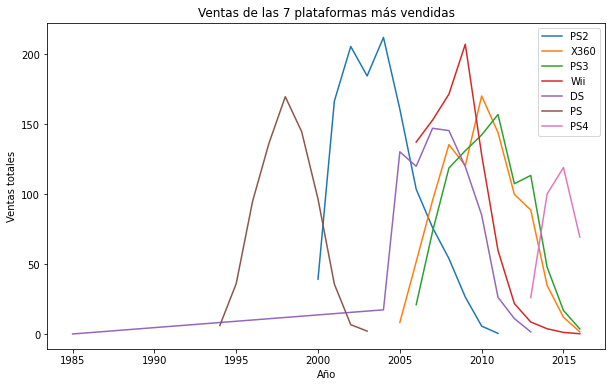

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))

for platform in top_platforms:
    platform_data = filtered_data[filtered_data["platform"] == platform]
    ax1.plot(platform_data["year_of_release"], platform_data["total_sales"], label=platform)

# Configurar el primer eje y para mostrar las ventas totales
ax1.set_xlabel("Año")
ax1.set_ylabel("Ventas totales")
ax1.set_title("Ventas de las 7 plataformas más vendidas")

# Configurar la leyenda
ax1.legend()

plt.show()

Aqui vemos que las diferentes consolas salieron en diferentes años y a medida que iban bajando las ventas de las consolas aumentaba las ventas de una nueva consula en el mercado, maso menos cada 5 años las consolas se van renovando, podes observar que la ultima consola que salio al mercado es PS4 y tuvo mayor venta que el resto de las consolas del mismo año.

La plataforma DS saio en el 2004 la linea que se observa es un error de los datos, que ya se vio anteriormente

Hacemos una tabla que nos muestre el número de ventas totales de cada plataforma

In [33]:
platform_sales2 = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales2

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Lo graficamos para tener una idea visual

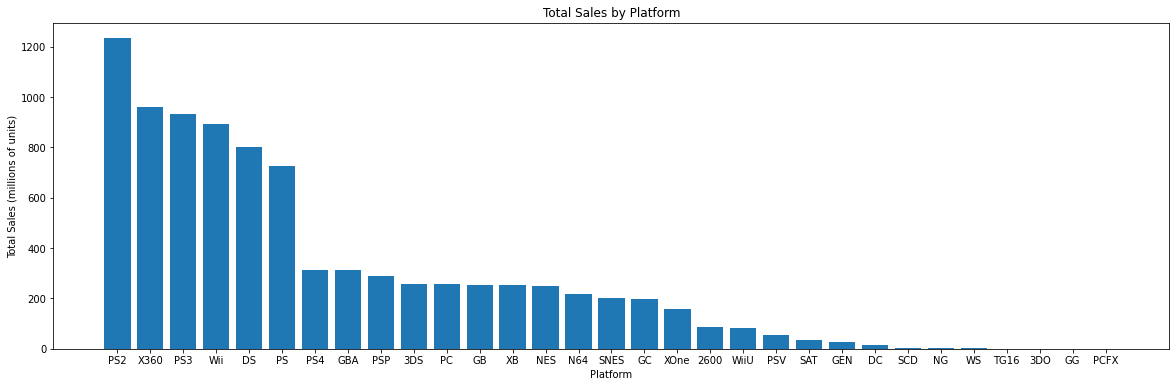

In [34]:
# Ordenar las plataformas por ventas totales en orden descendente
platform_sales2 = platform_sales2.sort_values(ascending=False)

# Tamaño del grafico
plt.figure(figsize=(20, 6))

# Grafico de barras de las ventas de plataformas
plt.bar(platform_sales2.index, platform_sales2.values)

# Agregar etiquetas y título
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions of units)')
plt.title('Total Sales by Platform')

plt.show()

Vemos que las plataformas lideres son PS2, X360, PS3, Wii, DS, PS y PS4, por el otro lado las de menos ventas fueron PCFX, GG, 3DO, TG16, WS, NG. Esto se debe a que son las plataformas mas antigüas cuando todavia no estaban muy desarrolladas las tecnologias de video juegos y no eran muy populares. Podemos observar que a medida que fueron evolucionando las tecnologias tambien lo hicieron las nuevas generaciones de plataformas.

Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

In [35]:
df_plataformas = df.groupby('platform')['name'].apply(list).reset_index(name='juegos')
df_plataformas.head()

,platform,juegos
0,2600,"[Pac-Man, Pitfall!, Asteroids, Missile Command..."
1,3DO,"[Policenauts, Bust-A-Move, Sotsugyou II: Neo G..."
2,3DS,"[Pokemon X/Pokemon Y, Mario Kart 7, Pokemon Om..."
3,DC,"[Sonic Adventure, Crazy Taxi, NFL 2K, Shenmue,..."
4,DS,"[New Super Mario Bros., Nintendogs, Mario Kart..."


 Calculamos las ventas globales por plataforma

In [36]:
# Calculamos las ventas globales por plataforma
ventas_globales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ventas_globales['total_sales'] = ventas_globales.sum(axis=1)

# Unimos esta información con el dataframe df_plataformas
df_plataformas_con_ventas = pd.merge(df_plataformas, ventas_globales['total_sales'], on='platform')
df_plataformas_con_ventas.head()

,platform,juegos,total_sales
0,2600,"[Pac-Man, Pitfall!, Asteroids, Missile Command...",86.48
1,3DO,"[Policenauts, Bust-A-Move, Sotsugyou II: Neo G...",0.10
2,3DS,"[Pokemon X/Pokemon Y, Mario Kart 7, Pokemon Om...",257.81
3,DC,"[Sonic Adventure, Crazy Taxi, NFL 2K, Shenmue,...",15.95
4,DS,"[New Super Mario Bros., Nintendogs, Mario Kart...",802.78


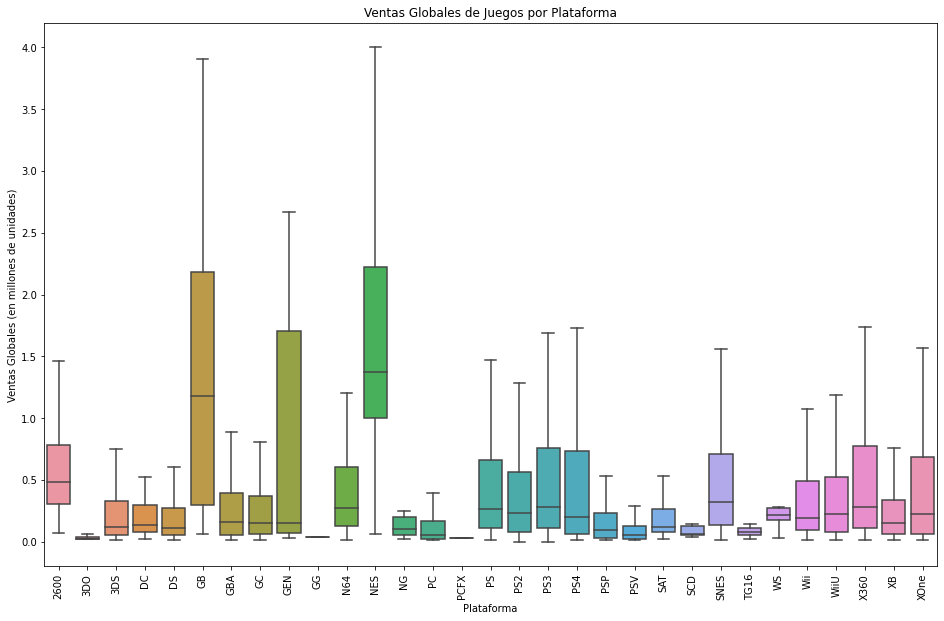

In [37]:
# Crear un diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(16,10))
sns.boxplot(x='platform', y='total_sales', data=df, order=df_plataformas_con_ventas['platform'], showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones de unidades)')
plt.title('Ventas Globales de Juegos por Plataforma')
plt.show()

Las plataformas con mayor venta de videojuegos  (GB, GEN y NES) son aquellas que tambien poseen una mayor cantidad de valores atipicos (tuve que eliminarlos de la grafica porque sino me era imposible verla), esto quiere decir que no son muy confiables estos datos.

Por otro lado las plataformas, XONE, X360, WiiU, Wii, 2600, SNES, PC, PS, PS2, PS3, PS4 y N64, se aprecian bien y estan dentro de un mismo rango de valores superiores, por lo que se podria creer que las ventas promedios de las diferentes plataformas son similares

Y las plataformas con menos ventas de videojuegos fueron, 3DO, 3DS, DS, NG, PCFX, PSP, PSV, SAT, SCD, TG16, WS y GG

### Reseñas

Veremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular en este caso PS2. Crearemos gráficos de dispersión y calcularemos la correlación entre las reseñas y las ventas. 

Grafico de disperción para las reseñas de los expertos

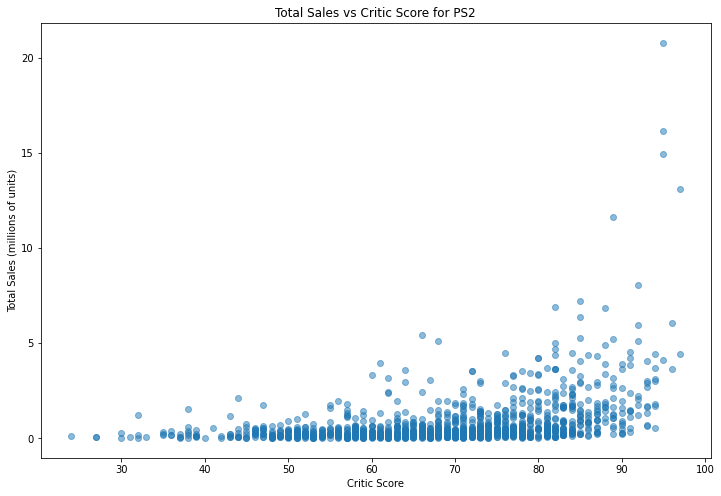

In [38]:
# Seleccionar solo los datos de PS2
ps2_data = df[df['platform'] == 'PS2']

fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de dispersión
plt.scatter(ps2_data['critic_score'], ps2_data['total_sales'], alpha=0.5)

# Agregar títulos y etiquetas de ejes
plt.title('Total Sales vs Critic Score for PS2')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions of units)')

# Mostrar el gráfico
plt.show()

In [39]:
correlation = ps2_data['critic_score'].corr(ps2_data['total_sales'])
print(f"La correlación entre critic_score and total_sales para los juegos de  PS2 es {correlation}")

La correlación entre critic_score and total_sales para los juegos de  PS2 es 0.39253647544509


 En el grafico los `critic_score` parece tener una forma exponencial a mejor puntaje muchas mas ventas y por la correlación sabemos que son directamente propocionales

Grafico de disperción para las reseñas de los usuarios

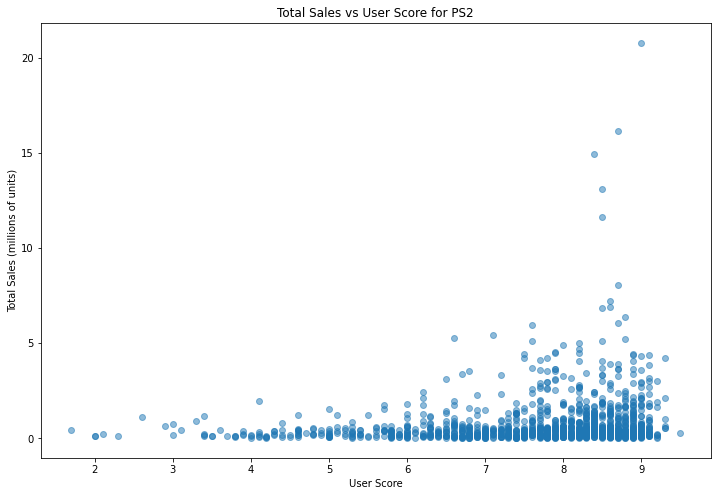

In [40]:
# Seleccionar solo los datos de PS2
ps2_data = df[df['platform'] == 'PS2']

fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de dispersión
plt.scatter(ps2_data['user_score'], ps2_data['total_sales'], alpha=0.5)

# Agregar títulos y etiquetas de ejes
plt.title('Total Sales vs User Score for PS2')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions of units)')

# Mostrar el gráfico
plt.show()

In [41]:
correlation = ps2_data['user_score'].corr(ps2_data['total_sales'])
print(f"La correlación entre user_score and total_sales para los juegos de  PS2 es {correlation}")

La correlación entre user_score and total_sales para los juegos de  PS2 es 0.1750550277038374


 En el grafico los `user_score` parece tener tambien una forma exponencial, pero los mayores puntajes se encuentran entre 8.5 y 9 y por la correlación sabemos que son directamente propocionales

### Comparacion de un mismo video juego en diferentes plataformas

Agrupare los diferentes juegos por las plataformas en las que se puede jugar para podes comparar como influyen los juegos en las plataformas

In [42]:
# Paso 1: crear una nueva columna con el número de plataformas por juego
df_plataformas['num_plataformas'] = df_plataformas['juegos'].apply(len)

# Paso 2: crear una lista de juegos que aparecen en más de dos plataformas
juegos_repetidos = df_plataformas[df_plataformas['num_plataformas'] > 2]['juegos'].explode().value_counts()
juegos_repetidos = juegos_repetidos[juegos_repetidos > 1].index.tolist()

# Paso 3: crear un nuevo DataFrame con los juegos repetidos
df_repetidos = df_plataformas[df_plataformas['juegos'].apply(lambda x: any(item in juegos_repetidos for item in x))]
df_repetidos

# Paso 4: convertir las listas de juegos a tuplas
df_repetidos.loc[:, 'juegos'] = df_repetidos['juegos'].apply(tuple)

# Paso 5: agrupar el DataFrame y concatenar las plataformas en una cadena de texto
df_agrupado = df_repetidos.groupby('juegos')['platform'].apply(lambda x: ', '.join(x)).reset_index()
df_agrupado

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,juegos,platform
0,"(Call of Duty: Black Ops 3, Grand Theft Auto V...",XOne
1,"(Call of Duty: Black Ops 3, Grand Theft Auto V...",PS4
2,"(Final Fantasy, Digimon Adventure: Anode Tamer...",WS
3,"(Gran Turismo, Final Fantasy VII, Gran Turismo...",PS
4,"(Grand Theft Auto V, Call of Duty: Black Ops I...",PS3
5,"(Grand Theft Auto: Liberty City Stories, Monst...",PSP
6,"(Grand Theft Auto: San Andreas, Grand Theft Au...",PS2
7,"(Halo 2, Halo: Combat Evolved, Tom Clancy's Sp...",XB
8,"(Kinect Adventures!, Grand Theft Auto V, Call ...",X360
9,"(Mario Kart 8, New Super Mario Bros. U, Super ...",WiiU


En la tabla de arriba podemos los diferentes juegos y para que plataforma se encuentran disponibles

Ahora vamos a comparar algunos juegos con las plataformas, para ver cuales son las que mas se juegan

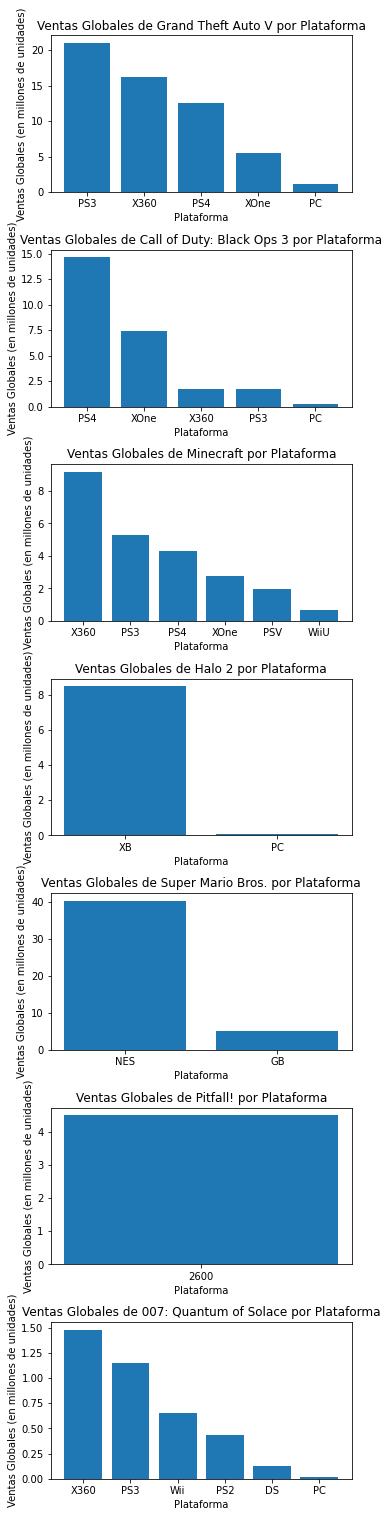

In [43]:
# Definir la lista de nombres de juegos a comparar
nombres_juegos = ['Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'Minecraft', 'Halo 2', 'Super Mario Bros.', 'Pitfall!', '007: Quantum of Solace']

# Crear una figura con múltiples subplots
fig, axs = plt.subplots(len(nombres_juegos), 1, figsize=(5, 3 * len(nombres_juegos)))

# Iterar sobre los nombres de juegos y crear un gráfico para cada uno de ellos
for i, nombre_juego in enumerate(nombres_juegos):
    # Filtrar los datos del juego en cuestión
    df_juego = df[df['name'] == nombre_juego]

    # Crear un gráfico de barras para comparar las ventas del juego en diferentes plataformas
    axs[i].bar(df_juego['platform'], df_juego['total_sales'])
    axs[i].set_xlabel('Plataforma')
    axs[i].set_ylabel('Ventas Globales (en millones de unidades)')
    axs[i].set_title('Ventas Globales de ' + nombre_juego + ' por Plataforma')

# Ajustar los subplots para que no se superpongan
fig.tight_layout()

# Mostrar el gráfico
plt.show()


Podemos ver que los juegos con mas ventas para las diferentes plataformas, varian no hay una plataforma que sea la mas deseada a la hora de comprar un juego, todo depende de la preferencia del jugador por la plataforma y a veces de la disponibilidad del juego para las diferentes plataformas como en el caso del Pitfall! que solo salio para 2600 o el Super Mario Bros. que es de la compañia Nintendo y salio para NES y luego Nintendo lo saco para GB.

### Distribución de los juegos por género

Vamos a crear un grafico que me muestre cuales son los generos mas jugados

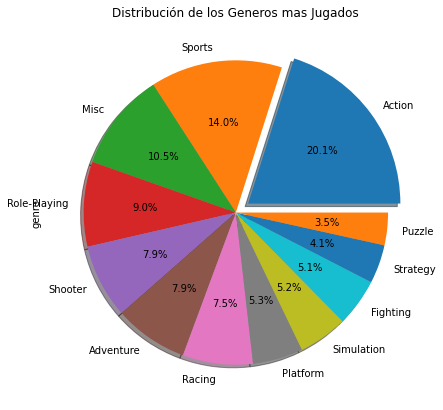

In [44]:
df['genre'].value_counts()[:12].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Distribución de los Generos mas Jugados')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Podemos ver el genero favorito es el de Acción, seguido por los Deportes y los menos jugados son los Puzzle y de Estrategia

Ahora veremos cuales son las plataformas preferidas a la hora de jugar

Text(0.5, 1.0, 'Ranking de las plataformas para Jugar')

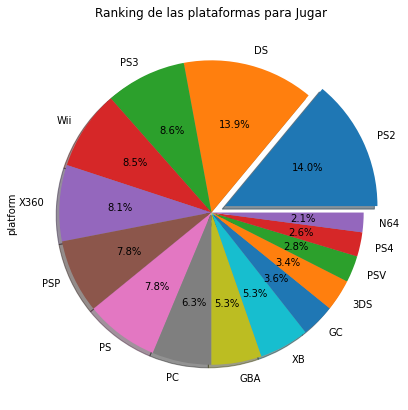

In [45]:
df['platform'].value_counts()[:15].plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Ranking de las plataformas para Jugar')

Vemos que las mas elegidas por los jugadores son PS2, seguida de DS, y las menos elegidas son N64 y PS4, pero cuidado PS4 es la ultima plataforma que salio al mercado, es logico que halla menos juegos para esta plataforma y por lo que vimos anteriormente es la unica con ventas en aumentos para el 2015

Ahora haremos un grafico de calor que nos muestre que generos son los mas jugados en las 15 plataformas mas jugadas

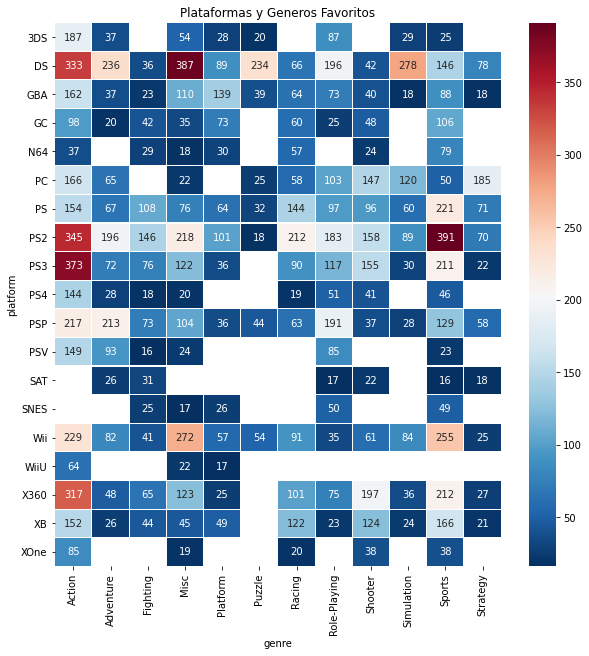

In [46]:
# Seleccionar las columnas necesarias
plat_genre = df[["platform", "genre"]]

# Filtrar los géneros más populares
pop_genres = df.groupby("genre")["total_sales"].sum().nlargest(12).index
plat_genre = plat_genre[plat_genre["genre"].isin(pop_genres)]

# Agrupar los datos por plataforma y género
plat_genre = plat_genre.groupby(["platform", "genre"]).size().reset_index(name="count")

# Filtrar las combinaciones con una cantidad de juegos menor a 15
plat_genre = plat_genre[plat_genre["count"] > 15]

# Crear una tabla pivote
plat_genre = plat_genre.pivot(index="platform", columns="genre", values="count")

# Eliminar las filas con valores nulos
plat_genre = plat_genre.dropna(thresh=3)

# Crear un mapa de calor
sns.heatmap(plat_genre, annot=True, fmt='2.0f', cmap='RdBu_r', linewidths='0.1')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Plataformas y Generos Favoritos')
plt.show()

Vemos nuevamente que los generos favoritos para las diferentes plataformas son en su mayoria Acción y Deporte. Para DS el genero mas jugado es Misc. seguido de Acción, Simulación y Puzzle. 

Esto tiene que ver tambien porque no todas las plataformas tienen juegos para todos los generos, por ejemplo la WiiU solo tiene juegos de los generos Acción, Misc y Plataforma

## Crear un perfil de usuario para cada región

Para cada región (NA, UE, JP) vamos a determina:
- Las cinco plataformas principales.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


### Las cinco plataformas principales

Creamos las 5 plataformas principales para cada region 

In [47]:
# Las cinco plataformas principales en Norteamérica
na_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco plataformas principales en Norteamérica:\n', na_platforms)

# Las cinco plataformas principales en Europa
eu_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco plataformas principales en Europa:\n', eu_platforms)

# Las cinco plataformas principales en Japón
jp_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco plataformas principales en Japón:\n', jp_platforms)

Las cinco plataformas principales en Norteamérica:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Las cinco plataformas principales en Europa:
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Las cinco plataformas principales en Japón:
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


En Norte America como en Europa se repiten 4 de las 5 principales, mientras que en Japón predominan las plataformas de las compañias japonesas, como ser Sony y Nintendo

### Generos principales para cada región

In [48]:
# Las cinco géneros principales en Norteamérica
na_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco géneros principales en Norteamérica:\n', na_genres)

# Las cinco géneros principales en Europa
eu_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco géneros principales en Europa:\n', eu_genres)

# Las cinco géneros principales en Japón
jp_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Las cinco géneros principales en Japón:\n', jp_genres)

Las cinco géneros principales en Norteamérica:
 genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
Las cinco géneros principales en Europa:
 genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64
Las cinco géneros principales en Japón:
 genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Vemos nuevamente que 4 de los 5 generos se repiten en Norte America y en Europa, lo que nos indica que los jugadores de ambas regiones son parecidos a la hora de elegir un juego por su genero, mientras que en Japon el publico prefiere en primer lugar los juegos de rol superando casi por el doble al resto de los otros 4 generos mas jugados, que son los mismos que para Norte America y Europa

### Clasificacion de los juegos ESRB

In [49]:
# Clasificaciones ESRB en Norteamérica
na_ratings = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print('Clasificaciones ESRB en Norteamérica:\n', na_ratings)

# Clasificaciones ESRB en Europa
eu_ratings = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print('Clasificaciones ESRB en Europa:\n', eu_ratings)

# Clasificaciones ESRB en Japón
jp_ratings = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print('Clasificaciones ESRB en Japón:\n', jp_ratings)

Clasificaciones ESRB en Norteamérica:
 rating
E       1501.05
M        979.43
T        868.10
E10+     712.70
RP       181.06
EC        95.26
K-A        2.56
AO         1.26
Name: na_sales, dtype: float64
Clasificaciones ESRB en Europa:
 rating
E       847.26
M       595.60
T       466.30
E10+    353.93
RP      102.21
EC       33.50
AO        0.61
K-A       0.27
Name: eu_sales, dtype: float64
Clasificaciones ESRB en Japón:
 rating
E10+    398.35
E       323.90
M       179.00
T       170.29
RP      132.01
EC       85.63
K-A       1.46
AO        0.00
Name: jp_sales, dtype: float64


Las 5 clasificaciones ESRB en las 3 regiones son las mismas, en Norte America como en Europa se repiten exactamente las mismas, pero en Japon lidera los juegos para mayores de 10 años, esto nos puedo indicar que en Japon la mayoria del publico que juega son niños de 10 años en adelante o que el publico en general prefiere estos juegos.

## Hipotesis

Vamos a poner a prueba las siguientes hipótesis para los años 2010 al 2016:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

### Primera hipotesis

Hipotesis Nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipotesis Alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

In [50]:
# Filtro de datos para Xbox One y PC en los años 2010 a 2016
xbox_scores = df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]['user_score'].dropna()
pc_scores = df[(df['platform'] == 'PC') & (df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]['user_score'].dropna()

# Calculo de las medias y desvio estandar para Xbox y PC
xbox_mean = np.mean(xbox_scores)
pc_mean = np.mean(pc_scores)

xbox_std = np.std(xbox_scores, ddof=1)
pc_std = np.std(pc_scores, ddof=1)

print("Media de calificaciones de usuario para Xbox One:", xbox_mean)
print("Desviación estándar de calificaciones de usuario para Xbox One:", xbox_std)
print("Media de calificaciones de usuario para PC:", pc_mean)
print("Desviación estándar de calificaciones de usuario para PC:", pc_std)

# Usamos un nivel de significancia del 5%
alpha = 0.05



# Aplicar la prueba de Levene
test_result = levene(xbox_scores, pc_scores)

# Obtener el valor p de la prueba
p_value = test_result.pvalue

# Imprimir los resultados
if p_value < alpha:
    print("Las varianzas son diferentes (rechazamos la hipótesis nula de Levene)")
else:
    print("Las varianzas son iguales (no podemos rechazar la hipótesis nula de Levene)")

print("Valor p de Levene:", p_value)



# Prueba t-Student
test_result = ttest_ind(xbox_scores, pc_scores, equal_var=False)
p_value = test_result.pvalue

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print("Valor p:", p_value)

Media de calificaciones de usuario para Xbox One: 6.521428571428572
Desviación estándar de calificaciones de usuario para Xbox One: 1.380940564592144
Media de calificaciones de usuario para PC: 6.5181818181818185
Desviación estándar de calificaciones de usuario para PC: 1.5653900520671817
Las varianzas son diferentes (rechazamos la hipótesis nula de Levene)
Valor p de Levene: 0.033971871409421345
No podemos rechazar la hipótesis nula
Valor p: 0.9801634129117883


No existe evidencia suficiente para rechazar la Hipotesis Nula, las clasificaciones promedio para Xbox One y PC son iguales

### Segunda Hipotesis

Hipotesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipotesis Alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [51]:
# Filtro de datos para Acción y Deportes en los años 2010 a 2016
action_scores = df[(df['genre'] == 'Action') & (df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]['user_score'].dropna()
sport_scores = df[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]['user_score'].dropna()

# Calculo de las medias y desvio estandar para Acción y Deportes
action_mean = np.mean(action_scores)
sport_mean = np.mean(sport_scores)

action_std = np.std(action_scores, ddof=1)
sport_std = np.std(sport_scores, ddof=1)

print("Media de calificaciones de usuario para el género de Acción:", action_mean)
print("Desviación estándar de calificaciones de usuario para el género de Acción:", action_std)
print("Media de calificaciones de usuario para el género de Deportes:", sport_mean)
print("Desviación estándar de calificaciones de usuario para el género de Deportes:", sport_std)

# Usamos un nivel de significancia del 5%
alpha = 0.05



# Aplicar la prueba de Levene
test_result = levene(action_scores, sport_scores)

# Obtener el valor p de la prueba
p_value = test_result.pvalue

# Imprimir los resultados
if p_value < alpha:
    print("Las varianzas son diferentes (rechazamos la hipótesis nula de Levene)")
else:
    print("Las varianzas son iguales (no podemos rechazar la hipótesis nula de Levene)")

print("Valor p de Levene:", p_value)



# Prueba t-Student
test_result = ttest_ind(action_scores, sport_scores, equal_var=False)
p_value = test_result.pvalue

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print("Valor p:", p_value)


Media de calificaciones de usuario para el género de Acción: 6.781899871630296
Desviación estándar de calificaciones de usuario para el género de Acción: 1.3602012875529312
Media de calificaciones de usuario para el género de Deportes: 5.901587301587302
Desviación estándar de calificaciones de usuario para el género de Deportes: 1.6839342074810588
Las varianzas son diferentes (rechazamos la hipótesis nula de Levene)
Valor p de Levene: 1.3235677783725728e-05
Rechazamos la hipótesis nula
Valor p: 1.4516152467844418e-15


Existe evidencia suficiente para rechazar la hipotesis nula, por lo que el promedio de los usuarios de los generos Acción y Deporte no son los mismos

## Conclusión General

La industria de los videojuegos es una industria en ascenso, esto lo podemos apreciar gracias a las primeras plataformas que salieron por la decada del ´80 y como fueron aumentando las ventas de los videojuegos al igual que los diferentes generos y plataformas en donde jugarlos.
A medida que las tecnologias visuales se volvieron mas complejas al igual que el procesamiento de los datos, las plataformas evolucionaron rapidamente para competir entre ellas para darles diferentes experiencias a los usuarios, desde ser moviles como el GameBoy y la PSP, hasta ser inmersivos como la Wii y la WiiU.

Las 3 compañias mas grandes de video juegos estan representadas con sus plataformas de juegos dentro del Top de Plataformas, Nintendo con la DS y Wii, Sony con PS2 y Microsoft con X360, la popularidad de estas plataformas se deben algran abanico de juegos que poseen que a su vez pueden ser jugados en cada uno de estos dipositivos como por ejemplo el juego 007: Quantum of Solace. 

La plataforma que menos se usa dentro del Top, es la PC, esto se puede deber que las PC no solo ses usan para jugar, sino tambien para trabajar y mientras que los juegos que salen están adaptados para la plataforma que se juegue en la PC a veces se necesitan las ultimas genereaciones de componentes de video y de memoria para poder correr el juego correctamente lo que es un limitante para muchos usuarios a la hora de jugar.
 
Los generos de juegos principales fueron Acción y Deporte en las regiones de Norte America y Europa al igual que las clasificaiones ESRB fueron las mismas en ambas regiones. El mercado Japones es diferente al occidental, los japoneses prefieren otros tipos de plataformas como DS, PS y PS2, el genero que mas juegan es el de Role-Playing y la clasificacion con mas ventas fue E10+, esto puede ser porque los que juegan mas son los niños de 10 años en adelantes o porque estos tipos de juegos son los que mas gustan por su cultura.

## Recomendaciones para la Tienda Online Ice

Se recomienda para el marketing del siguiente año: 
- Hacer hincapie en los juegos de Acción y Deporte para las regiones de Norte America y Europa y los juegos de rol para Japon.
- Las consulas con mas ventas son PS2, DS, PS3, Wii y X360, pero la unica consola que termino el año 2016 con un aumento de ventas fue PS4, esto quiere decir que en el 2017 va ser importante hacer publicidad en la venta de esta plataforma y en sus juegos que van de la mano.
- Las clasificaciones para x360 y PC son diferentes ver bien cual es son las clasificaciones que mas se venden en cada plataforma para saber orientar las ventas de los videojuegos para estas consolas.
- Las recomendaciones de los expertos y la de los usuariarios si bien son parecidas no son las mismas, el usuario es mas exigente a la hora de poner un puntaje al videojuego, por lo que hay  que tenerlos mas en cuenta a la hora de las ventas, esto lo vemos porque casi no se ven juegos con puntaje 10 por los usuarios  que el mayor puntaje ronda entre 8 y 8.5 pero si en los experto que hay mas juegos con puntajes de 9 o mayor. 